<a href="https://colab.research.google.com/github/Dzhud/APV/blob/main/MAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling and Visualization




# Extraction, Transformation, and Loading Process


## Importing the necessary modules
#####NumPy and Pandas for creating and storing data in a dataframe as a Python object with Pandas and performing tabular functions with Numpy. Matplotlib and Seaborn are visualisation tools.

In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mount Google Drive
### To make exporting of files seamless. Therefore, it won't be necessary to include absolute file path as the filename will suffice.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SKYWARDS_DATA_CW2.csv to SKYWARDS_DATA_CW2.csv


# Exploratory Data Analysis (EDA)

#### This snippet below won't work after attempting to read the file with Pandas' `read_csv` method.

```
original_data = pd.read_csv('SKYWARDS_DATA_CW2.csv')
```
Got `utf-8' codec can't decode byte 0xe3 in position 22088: invalid continuation byte` error response.


It's a `UnicodeDecodeError` and it typically occurs when reading a file that contains non-UTF-8 encoded characters. To fix, a different encoding was specified when reading the file hence the `encoding` parameter set to 'ISO-8859-1' (Eric 2020).

In [ ]:
original_data = pd.read_csv('SKYWARDS_DATA_CW2.csv', encoding='ISO-8859-1')

In [ ]:
# To display full dataset columns without truncations

pd.set_option('display.max_columns', None)

In [ ]:
original_data[original_data['Destination'] == 'São Tomé and Príncipe'].sample(3)

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,Destination,Continent,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
52334,52334,55970,Male,Y,38,35 to 44,Business travel,Business,3854,3855,São Tomé and Príncipe,Africa,3,5,5,5,5,4,4,3,3,3,3,2,3,4,25,29.0
62580,62580,71356,Female,N,51,45 to 54,Business travel,Business,3857,3855,São Tomé and Príncipe,Africa,0,0,0,4,0,4,5,1,1,1,1,4,1,5,0,0.0
1114,1114,95839,Female,Y,41,35 to 44,Business travel,Business,3857,3855,São Tomé and Príncipe,Africa,2,1,1,1,5,4,3,2,2,2,2,3,2,4,0,0.0


In [ ]:
print(f"\nSão Tomé and Príncipe appears {len(original_data[original_data['Destination'] == 'São Tomé and Príncipe'])} times in the Dataset\n" )


São Tomé and Príncipe appears 37 times in the Dataset



###Data Cleaning

In [ ]:
# Initial dataset is copied in a new vairable 'skywards_data' with Pandas' `copy()` method

skywards_data = original_data.copy()
skywards_data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,Destination,Continent,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,460,4760,India,Asia,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,235,Republic of Ireland,Europe,0,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,1142,4760,India,Asia,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,562,560,Norway,Europe,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,N,61,55 to 64,Business travel,Business,214,4760,India,Asia,3,3,3,3,0,5,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
# Drop the 'ref', 'id', 'Flight Distance', and 'Continent' columns because they're superfluous
# This is done with Python's `del` keyword

del skywards_data['id']

In [ ]:
del skywards_data['Ref']

In [ ]:
del skywards_data['Flight Distance']

In [ ]:
del skywards_data['Continent']

In [ ]:
skywards_data.shape

(103904, 24)

In [ ]:
# Inspect the data - EDA

skywards_data.describe()

,Age,Flight Distance Rounded,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,1.951956,3.250250,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.875950,1.349607,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.774453
min,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# To see the datatype of each column
skywards_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Satisfied                          103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Age Band                           103904 non-null  object 
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance Rounded            103904 non-null  int64  
 7   Destination                        103904 non-null  object 
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
# Check the unique value of the columns to see if incompatible values aren't present.

skywards_data['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
# Checking the data frame for the number of null values in skywards_data

skywards_data.isna().sum()

Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance Rounded                0
Destination                            0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
dtype: int64

In [ ]:
# There are 310 rows with missing values in the 'Arrived Delay in Miutes' field.
# 310 is too much to drop. Therefore 0 value is added with Pandas' `fillna()`

skywards_data = skywards_data.fillna(0)

In [ ]:
# Check for duplicates

skywards_data.duplicated().sum()

420

In [ ]:
# Drop the 420 Duplicates
skywards_data = skywards_data.drop_duplicates()

In [ ]:
# To confirm that all duplicates are dropped. This code returns0
skywards_data.duplicated().sum()

0

In [ ]:
# Using 'Age' as the primary attribute, sorting the provided data in the dataframe in descending order.

skywards_data = skywards_data.sort_values(by='Age', ascending=False)

In [ ]:
# Confirm that there are no more null values

skywards_data.isna().sum()


Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance Rounded              0
Destination                          0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

##Feature Engineering


#### Machine Learning models understands number values more than strings. Hence, this line of code creates a boolean series where each ‘Y’ is True and each ‘N’ is False. The .astype(int) Pandas' method then converts this boolean series to integers, where True becomes 1 and False becomes 0. So, after this operation, Skyward_data's ‘Satisfied’ column will have 1s for ‘Y’ values and 0s for ‘N’ values. Likewise for 'Gender' column.

In [ ]:
skywards_data['Satisfied'] = (skywards_data['Satisfied'] == 'Y').astype(int)

In [ ]:
skywards_data['Gender'] = (skywards_data['Gender'] == 'Male').astype(int)

In [ ]:
skywards_data.sample(3)

,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance Rounded,Destination,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
20119,0,0,60,55 to 64,Business travel,Business,4760,India,1,1,1,1,0,4,5,2,2,2,2,4,2,5,52,54.0
12354,1,0,53,45 to 54,Business travel,Business,4760,India,3,3,2,3,0,5,4,4,4,4,4,3,4,4,6,13.0
37099,1,1,40,35 to 44,Business travel,Business,4760,India,3,3,3,3,2,4,4,4,4,4,4,3,4,3,20,0.0


In [ ]:
skywards_data['Gender'].unique()

array([1, 0])

In [ ]:
skywards_data['Satisfied'].unique()

array([0, 1])

## Data Analysis

### Percentage of Satisfied flyers

In [ ]:
satisfied_flyers = skywards_data[skywards_data['Satisfied'] == 1]

In [ ]:
"""
  This function calculates the percentage of a numerator relative to a denominator.

  Args:
      total_subset: The value to be expressed as a percentage of the denominator.
      total_flyers: The total value from which the percentage is calculated.

  Returns:
      The percentage value as a rounded up integer.
  """

def calculatePercentage(total_subset, total_flyers):

  return round((total_subset / total_flyers) * 100)

In [ ]:
print(f'Percentage of Satisfied flyers: {calculatePercentage(len(satisfied_flyers), len(skywards_data))}%')

Percentage of Satisfied flyers: 45%


### Percentage of Unsatisfied flyers

In [ ]:
unsatisfied_flyers = skywards_data[skywards_data['Satisfied'] == 0]

print(f'Percentage of Unsatisfied flyers: {calculatePercentage(len(unsatisfied_flyers), len(skywards_data))}%')

Percentage of Unsatisfied flyers: 55%


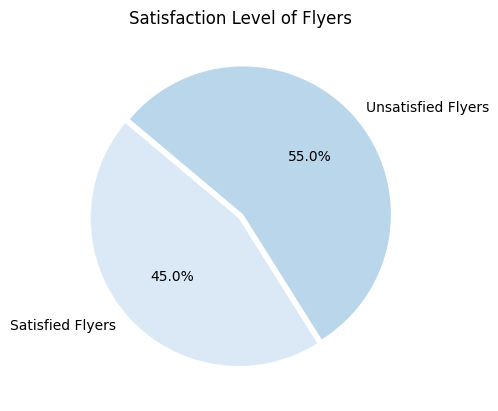

In [ ]:
# Piechart showing Percentage of Saisfied and Unsatified Flyers

flyer_counts = [len(satisfied_flyers), len(unsatisfied_flyers)]
flyer_labels = ['Satisfied Flyers', 'Unsatisfied Flyers']

palette = sns.color_palette("Blues")

# Create pie chart with space between slices
plt.pie(flyer_counts, labels=flyer_labels, colors=palette, autopct='%1.1f%%', startangle=140, explode=(0.02, 0.02))

# Display the pie chart
plt.title('Satisfaction Level of Flyers')
plt.show()

##Unsatisfied Flyers

In [ ]:
# Average Departure Delay of unsatisfied Flyers
mean_unsatisfied_departure = unsatisfied_flyers['Departure Delay in Minutes'].mean()
print(f'Average Departure Delay of Unsatisfied Flyers: {round(mean_unsatisfied_departure)} minutes')

Average Departure Delay of Unsatisfied Flyers: 15 minutes


In [ ]:
# Average Arrival Delay of unsatisfied Flyers
mean_unsatisfied_arrival = unsatisfied_flyers['Arrival Delay in Minutes'].mean()
print(f'Average Arrival Delay of Unsatisfied Flyers: {round(mean_unsatisfied_arrival)} minutes')

Average Arrival Delay of Unsatisfied Flyers: 15 minutes


In [ ]:
metrics_for_unsatisfied = unsatisfied_flyers[['Inflight wifi service',
                                             'Departure/Arrival time convenient', 'Ease of Online booking',
                                             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                                             'Inflight entertainment', 'On-board service', 'Leg room service',
                                             'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness']]

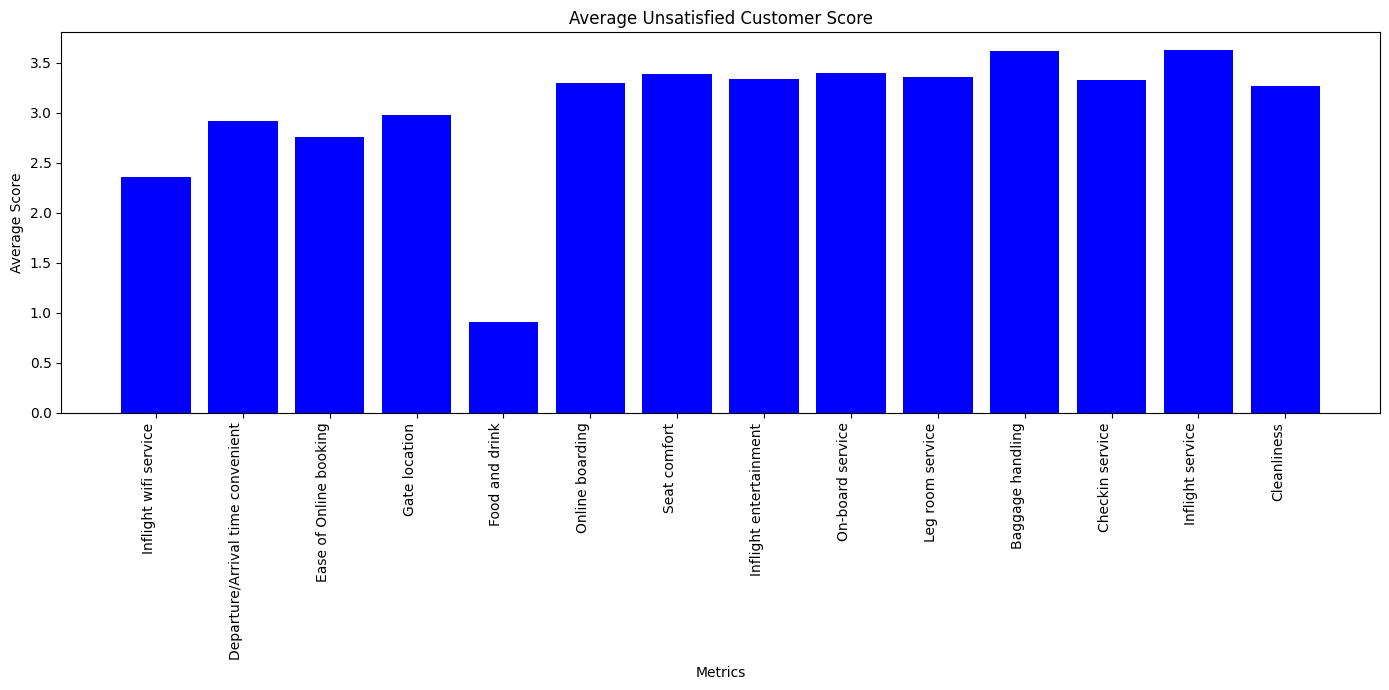

In [ ]:
mean_scores = metrics_for_unsatisfied.mean()

# Create a bar chart
plt.figure(figsize=(14, 7))
plt.bar(mean_scores.index, mean_scores.values, color='blue')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Average Score')
plt.title('Average Unsatisfied Customer Score')
plt.xticks(rotation=90, ha='right')  # Rotate labels for better readability

# Display the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

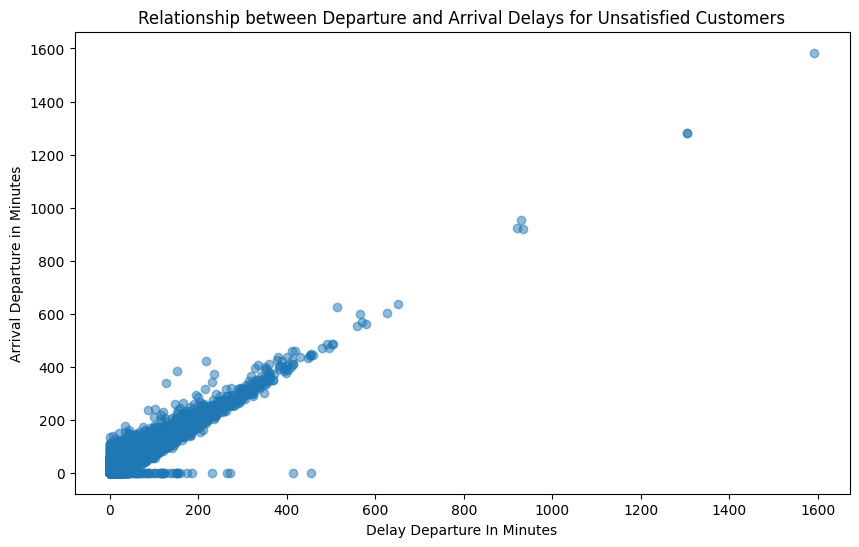

In [ ]:
unsat_departure_delays = unsatisfied_flyers['Departure Delay in Minutes']
unsat_arrival_delays = unsatisfied_flyers['Arrival Delay in Minutes']

plt.figure(figsize=(10, 6))
plt.scatter(unsat_departure_delays, unsat_arrival_delays, alpha=0.5)

# Add labels and title
plt.xlabel('Delay Departure In Minutes')
plt.ylabel('Arrival Departure in Minutes')
plt.title('Relationship between Departure and Arrival Delays for Unsatisfied Customers')

# Show the scatter plot
plt.show()

##Satisifed Users

In [ ]:
# Average Departure Delay of Satisfied Flyers
mean_satisfied_departure = satisfied_flyers['Departure Delay in Minutes'].mean()
print(f'Average Departure Delay of Satisfied Flyers: {round(mean_satisfied_departure)} minutes')

Average Departure Delay of Satisfied Flyers: 15 minutes


In [ ]:
# Average Arrival Delay of Satisfied Flyers
mean_satisfied_arrival = satisfied_flyers['Arrival Delay in Minutes'].mean()
print(f'Average Arrival Delay of Satisfied Flyer: {round(mean_satisfied_arrival)} minutes')

Average Arrival Delay of Satisfied Flyer: 16 minutes


In [ ]:
metrics_for_satisfied = satisfied_flyers[['Inflight wifi service',
                                             'Departure/Arrival time convenient', 'Ease of Online booking',
                                             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                                             'Inflight entertainment', 'On-board service', 'Leg room service',
                                             'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness']]

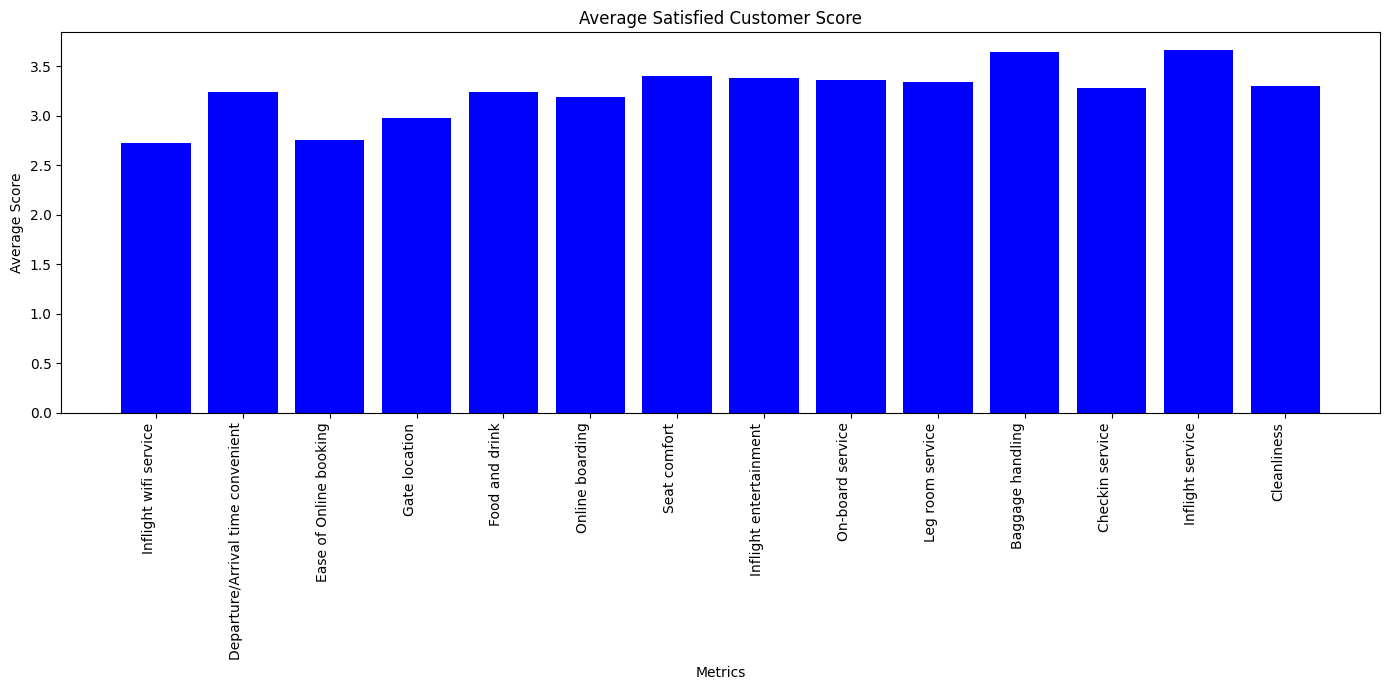

In [ ]:
mean_scores_sat = metrics_for_satisfied.mean()
# Create a bar chart
plt.figure(figsize=(14, 7))
plt.bar(mean_scores_sat.index, mean_scores_sat.values, color='blue')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Average Score')
plt.title('Average Satisfied Customer Score')
plt.xticks(rotation=90, ha='right')  # Rotate labels for better readability

# Display the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

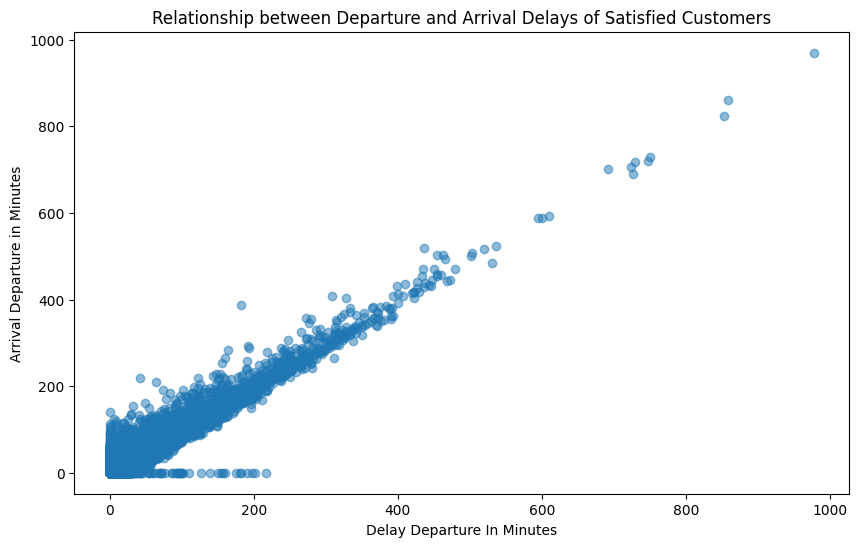

In [ ]:
sat_departure_delays = satisfied_flyers['Departure Delay in Minutes']
sat_arrival_delays = satisfied_flyers['Arrival Delay in Minutes']

plt.figure(figsize=(10, 6))
plt.scatter(sat_departure_delays, sat_arrival_delays, alpha=0.5)

# Add labels and title
plt.xlabel('Delay Departure In Minutes')
plt.ylabel('Arrival Departure in Minutes')
plt.title('Relationship between Departure and Arrival Delays of Satisfied Customers')

# Show the scatter plot
plt.show()


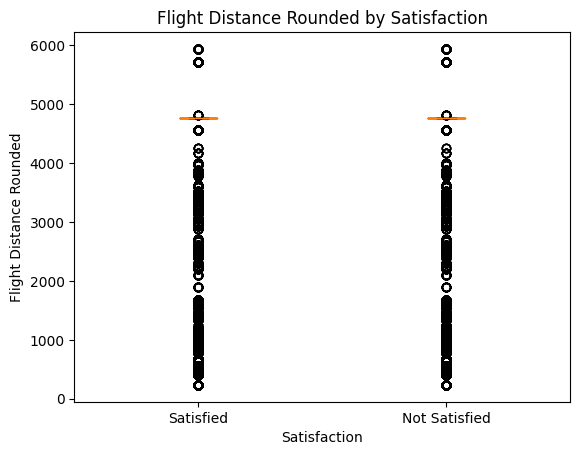

In [ ]:
# Visualize the data using a boxplot to compare the flight distances for satisfied and unsatisfied passengers
fig, ax = plt.subplots()

# Create a boxplot
satisfied_data = satisfied_flyers['Flight Distance Rounded']
unsatisfied_data = unsatisfied_flyers['Flight Distance Rounded']
ax.boxplot([satisfied_data, unsatisfied_data], labels=['Satisfied', 'Not Satisfied'])

# Add labels and title
ax.set_xlabel('Satisfaction')
ax.set_ylabel('Flight Distance Rounded')
ax.set_title('Flight Distance Rounded by Satisfaction')

# Show the plot
plt.show()

##Gender

In [ ]:
s# To calculate the percentage of satisifed and unsatifeied male passengers
total_male = skywards_data[skywards_data['Gender'] == 1]
print(f"Total Number of Male Flyers: {len(total_male)}")
print(f"Percentage of Flyers that are Male: {calculatePercentage(len(total_male), len(skywards_data))}%")
sat_total_male = total_male[total_male['Satisfied'] == 1]
unsat_total_male = total_male[total_male['Satisfied'] == 0]
avg_male = total_male['Age'].values

print(f"Percentage of Satified Male Flyers Against Total Number of Flyers: {calculatePercentage(len(sat_total_male), len(skywards_data))}%")
print(f"Percentage of Unsatified Male Flyers Against Total Males: {calculatePercentage(len(unsat_total_male), len(total_male))}%")
print(f"Percentage of Satified Male Flyers Against Total Males: {calculatePercentage(len(sat_total_male), len(total_male))}%")
print(f"Average Age of Male Flyers is {round(avg_male.mean())}")

Total Number of Male Flyers: 50968
Percentage of Flyers that are Male: 49%
Percentage of Satified Male Flyers Against Total Number of Flyers: 23%
Percentage of Unsatified Male Flyers Against Total Males: 54%
Percentage of Satified Male Flyers Against Total Males: 46%
Average Age of Male Flyers is 39


In [ ]:
# To calculate the percentage of satisfied and unsatified female passengers
total_female = skywards_data[skywards_data['Gender'] == 0]
print(f"Total Number of Female Flyers: {len(total_female)}")
print(f"Percentage of Flyers that are Female: {calculatePercentage(len(total_female), len(skywards_data))}%")
sat_total_female = total_female[total_female['Satisfied'] == 1]
unsat_total_female = total_female[total_female['Satisfied'] == 0]
avg_female = total_female['Age'].values

print(f"Percentage of Satified Female Flyers Against Total Number of Flyers: {calculatePercentage(len(sat_total_female), len(skywards_data))}%")
print(f"Percentage of Unsatified Female Flyers Against Total Females: {calculatePercentage(len(unsat_total_female), len(total_female))}%")
print(f"Percentage of Satified Female Flyers Against Total Females: {calculatePercentage(len(sat_total_female), len(total_female))}%")
print(f"Average Age of Female Flyers is {round(avg_female.mean())}")

Total Number of Female Flyers: 52516
Percentage of Flyers that are Female: 51%
Percentage of Satified Female Flyers Against Total Number of Flyers: 22%
Percentage of Unsatified Female Flyers Against Total Females: 56%
Percentage of Satified Female Flyers Against Total Females: 44%
Average Age of Female Flyers is 39


## Stack Chart Showing Type of Travel Composition

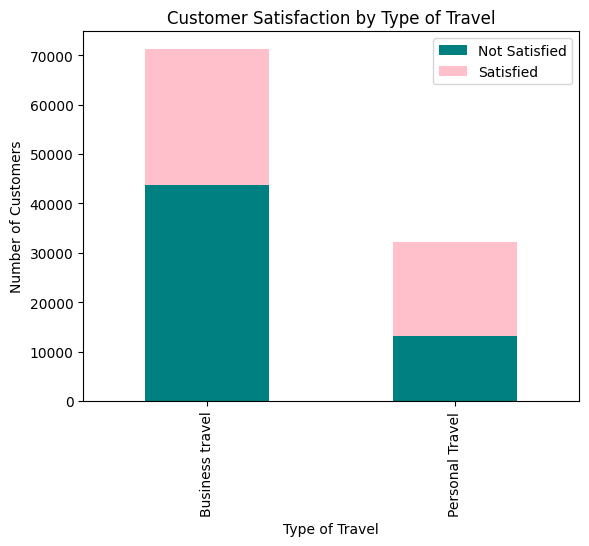

In [ ]:
# Count the number of satisfied/unsatisfied customers for each type of travel
satisfaction_counts = skywards_data.groupby(['Type of Travel', 'Satisfied']).size().unstack(fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots()
satisfaction_counts.plot(kind='bar', stacked=True, ax=ax, color=['teal', 'pink'])

# Add labels and title
ax.set_xlabel('Type of Travel')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Satisfaction by Type of Travel')

# Add a legend
ax.legend(['Not Satisfied', 'Satisfied'])

# Show the plot
plt.show()


## Class Disitribution Among Passengers

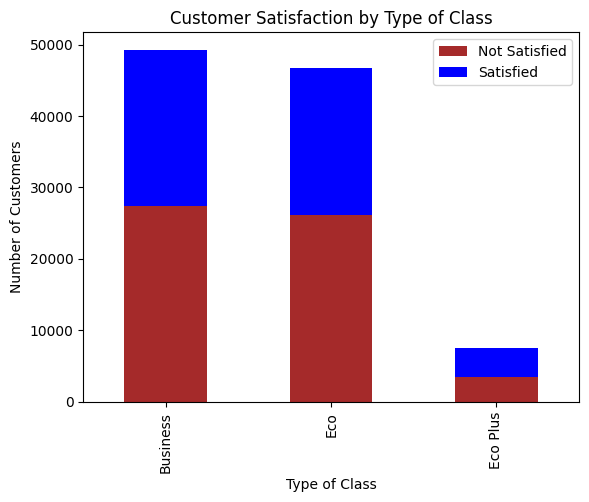

In [ ]:
# Count the number of satisfied/unsatisfied customers for each type of Class

# Count the number of satisfied/unsatisfied customers for each type of Class
satisfaction_counts = skywards_data.groupby(['Class', 'Satisfied']).size().unstack(fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots()
satisfaction_counts.plot(kind='bar', stacked=True, ax=ax, color=['brown', 'blue'])

# Add labels and title
ax.set_xlabel('Type of Class')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Satisfaction by Type of Class')

# Add a legend
ax.legend(['Not Satisfied', 'Satisfied'])

# Show the plot
plt.show()


## Eco Plus Flyers

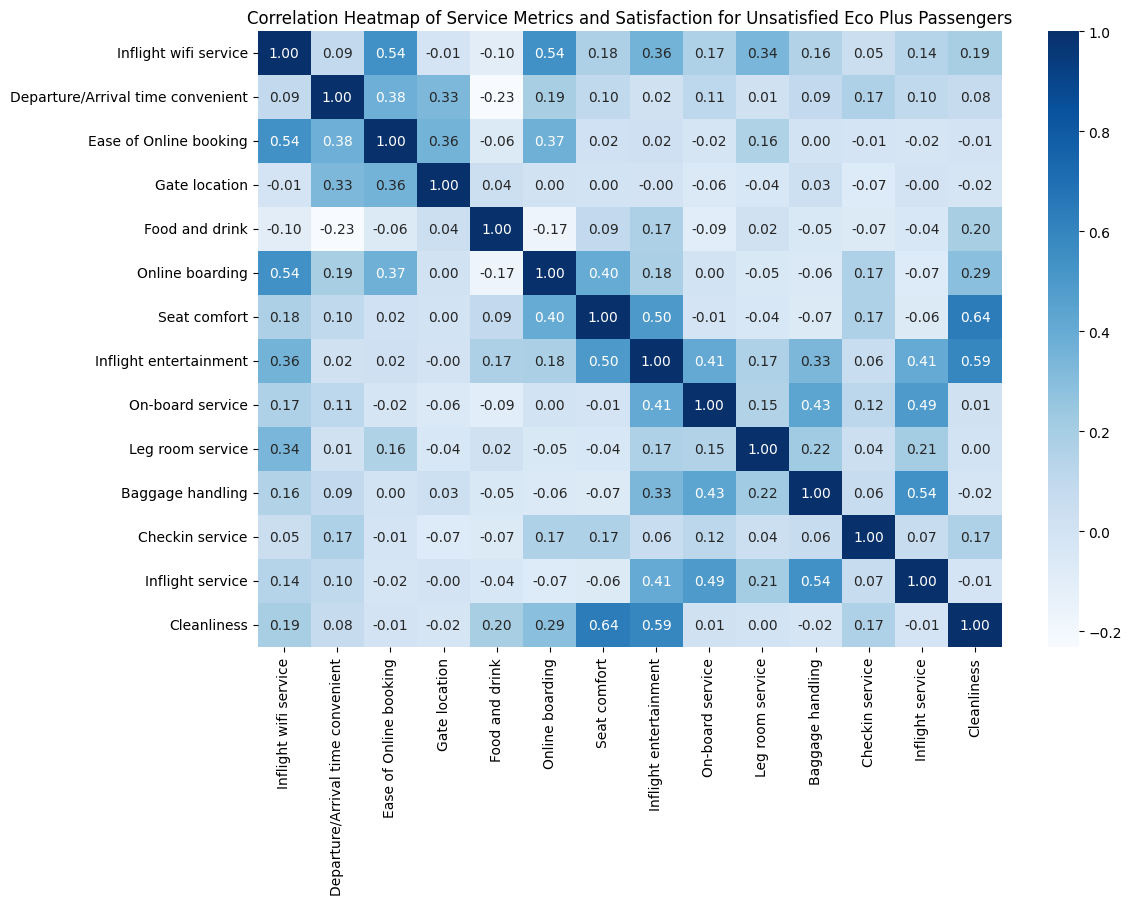

In [ ]:
## To see the Discontent of Eco Plus passengers
eco_plus_unsat = metrics_for_unsatisfied[unsatisfied_flyers['Class'] == 'Eco Plus']

# Calculate the correlation matrix
correlation_matrix = eco_plus_unsat.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues')

# Add labels and title
plt.title('Correlation Heatmap of Service Metrics and Satisfaction for Unsatisfied Eco Plus Passengers')
plt.show()


In [ ]:
eco_plus_unsat_all = unsatisfied_flyers[unsatisfied_flyers['Class'] == 'Eco Plus']
eco_plus_unsat_all = eco_plus_unsat_all[['Inflight wifi service',
                                             'Departure/Arrival time convenient', 'Ease of Online booking',
                                             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                                             'Inflight entertainment', 'On-board service', 'Leg room service',
                                             'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness']]

In [ ]:
skywards_unchained = skywards_data[['Inflight wifi service',
                                             'Departure/Arrival time convenient', 'Ease of Online booking',
                                             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                                             'Inflight entertainment', 'On-board service', 'Leg room service',
                                             'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness']]

####Using Poltly for Speedometer Visualization
General Service Rating from Flyers

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Determine the number of rows and columns for the subplot layout
num_columns = len(skywards_unchained.columns)
subplot_rows = 1
subplot_cols = num_columns

# Create a subplot figure with 1 row and as many columns as there are features
fig = make_subplots(rows=subplot_rows, cols=subplot_cols, specs=[[{'type': 'indicator'}]*num_columns])

# Loop through each column in the DataFrame and add a speedometer chart to the subplot
for index, column in enumerate(skywards_unchained.columns, start=1):
    mean_value = skywards_unchained[column].mean()
    fig.add_trace(go.Indicator(
        mode='gauge+number',
        value=mean_value,
        title={'text': column},
        gauge={'axis': {'range': [None, skywards_unchained[column].max()]}}  # Set the range based on the max value of the column
    ), row=1, col=index)

# Update layout to fit all the speedometers
fig.update_layout(
    width=300*num_columns,  # Adjust the total width based on the number of columns
    height=400,  # Adjust the height if necessary
    paper_bgcolor='white'
)



# Show the figure
fig.show()

#####Rating from dissatisifed Eco Plus Flyers

In [ ]:
# Determine the number of rows and columns for the subplot layout
num_columns = len(eco_plus_unsat_all.columns)
subplot_rows = 1
subplot_cols = num_columns

# Create a subplot figure with 1 row and as many columns as there are features
fig = make_subplots(rows=subplot_rows, cols=subplot_cols, specs=[[{'type': 'indicator'}]*num_columns])

# Loop through each column in the DataFrame and add a speedometer chart to the subplot
for index, column in enumerate(eco_plus_unsat_all.columns, start=1):
    mean_value = eco_plus_unsat_all[column].mean()
    fig.add_trace(go.Indicator(
        mode='gauge+number',
        value=mean_value,
        title={'text': column},
        gauge={'axis': {'range': [None, eco_plus_unsat_all[column].max()]}, 'bgcolor': 'gray'}  # Set the range based on the max value of the column
    ), row=1, col=index)

# Update layout to fit all the speedometers
fig.update_layout(
    width=300*num_columns,  # Adjust the total width based on the number of columns
    height=350,  # Adjust the height if necessary
    paper_bgcolor='white'
)

# Show the figure
fig.show()

In [ ]:
# Percentage of Passengers by Class
get_eco = skywards_data[skywards_data['Class'] == 'Eco']
get_eco_plus = skywards_data[skywards_data['Class'] == 'Eco Plus']
get_biz = skywards_data[skywards_data['Class'] == 'Business']

print(f"Percentage of Eco Class Flyers: {calculatePercentage(len(get_eco), len(skywards_data))}%")
print(f"Percentage of Eco Plus Class Flyers: {calculatePercentage(len(get_eco_plus), len(skywards_data))}%")
print(f"Percentage of Business Class Flyers: {calculatePercentage(len(get_biz), len(skywards_data))}%")

Percentage of Eco Class Flyers: 45%
Percentage of Eco Plus Class Flyers: 7%
Percentage of Business Class Flyers: 48%


###Business Class Ratings

In [ ]:
# For Unsatisified Business Class Flyers
for_biz = get_biz[get_biz['Satisfied'] == 0]
for_biz_services = get_biz[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                      'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 'Leg room service',
                      'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness']]

# Determine the number of rows and columns for the subplot layout
num_columns = len(for_biz_services.columns)
subplot_rows = 1
subplot_cols = num_columns

# Create a subplot figure with 1 row and as many columns as there are features
fig = make_subplots(rows=subplot_rows, cols=subplot_cols, specs=[[{'type': 'indicator'}]*num_columns])

# Loop through each column in the DataFrame and add a speedometer chart to the subplot
for index, column in enumerate(for_biz_services.columns, start=1):
    mean_value = for_biz_services[column].mean()
    fig.add_trace(go.Indicator(
        mode='gauge+number',
        value=mean_value,
        title={'text': column},
        gauge={'axis': {'range': [None, for_biz_services[column].max()]}, 'bgcolor': 'yellow'}  # Set the range based on the max value of the column
    ), row=1, col=index)

# Update layout to fit all the speedometers
fig.update_layout(
    width=300*num_columns,  # Adjust the total width based on the number of columns
    height=350,  # Adjust the height if necessary
    paper_bgcolor='beige'
)

# Show the figure
fig.show()

####Unsatisifed Dissatisfied Eco Flyers

In [ ]:
# For Unsatisified Eco Class Flyers
for_eco = get_eco[get_eco['Satisfied'] == 0]
for_eco_services = get_eco[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                      'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 'Leg room service',
                      'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness']]

# Determine the number of rows and columns for the subplot layout
num_columns = len(for_eco_services.columns)
subplot_rows = 1
subplot_cols = num_columns

# Create a subplot figure with 1 row and as many columns as there are features
fig = make_subplots(rows=subplot_rows, cols=subplot_cols, specs=[[{'type': 'indicator'}]*num_columns])

# Loop through each column in the DataFrame and add a speedometer chart to the subplot
for index, column in enumerate(for_eco_services.columns, start=1):
    mean_value = for_eco_services[column].mean()
    fig.add_trace(go.Indicator(
        mode='gauge+number',
        value=mean_value,
        title={'text': column},
        gauge={'axis': {'range': [None, for_eco_services[column].max()]}, 'bgcolor': 'orange'}  # Set the range based on the max value of the column
    ), row=1, col=index)

# Update layout to fit all the speedometers
fig.update_layout(
    width=300*num_columns,  # Adjust the total width based on the number of columns
    height=350,  # Adjust the height if necessary
    paper_bgcolor='white'
)

# Show the figure
fig.show()


In [ ]:
skywards_data['Age Band'].unique()

array(['65 or over', '55 to 64', '45 to 54', '35 to 44', '25 to 34',
       '18 to 24', 'Under 18'], dtype=object)

In [ ]:
skywards_data.columns

Index(['Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel', 'Class',
       'Flight Distance Rounded', 'Destination', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

##How Each Passenger Rated by Age Band

In [ ]:
skywards_data_services = skywards_data[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                      'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 'Leg room service',
                      'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness', 'Age Band']]

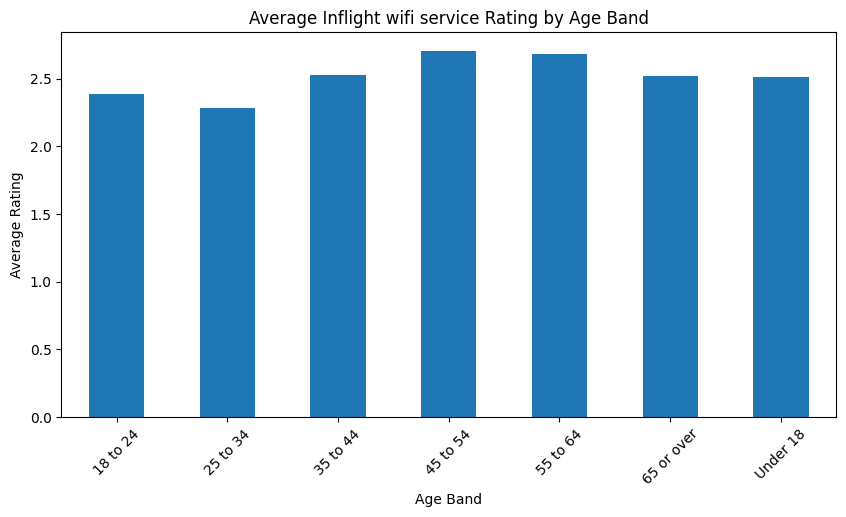

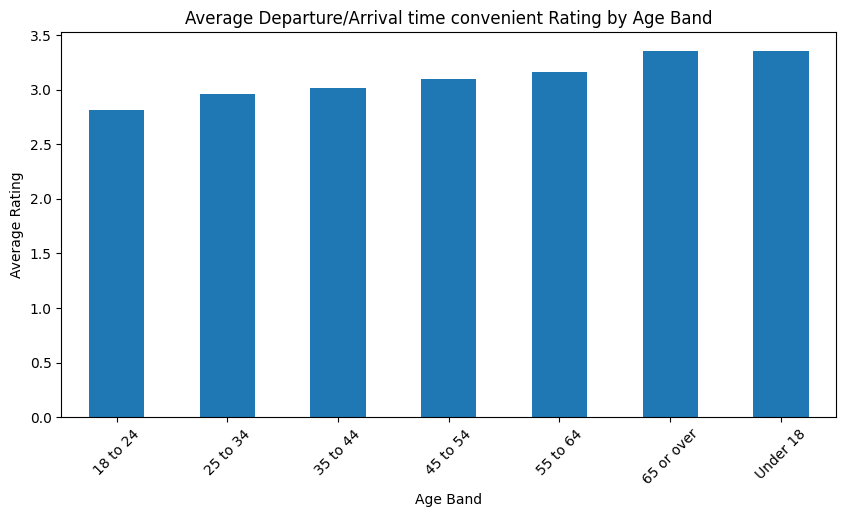

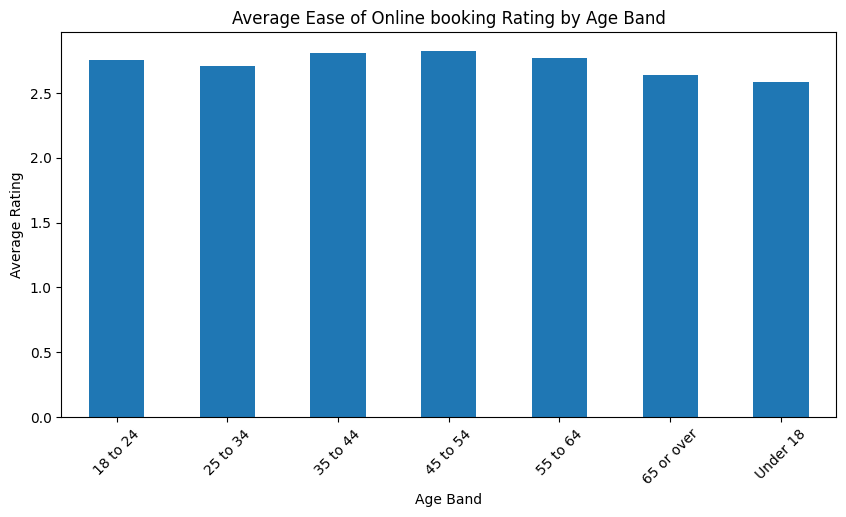

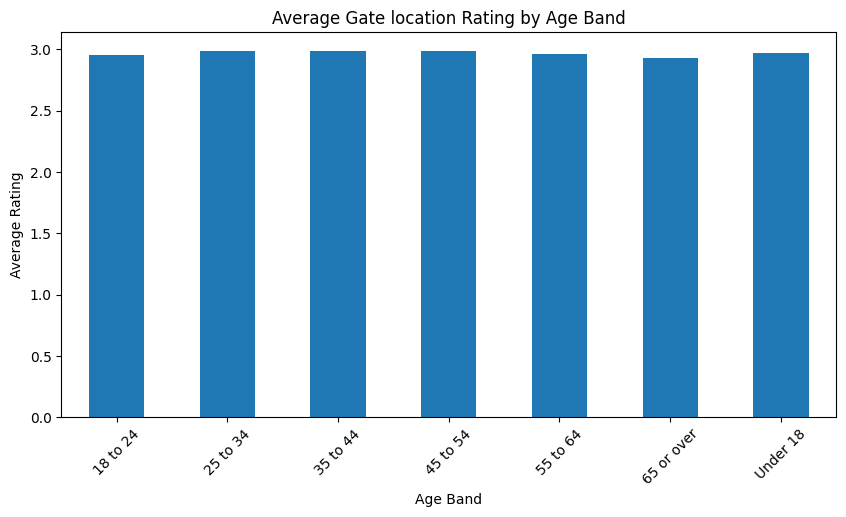

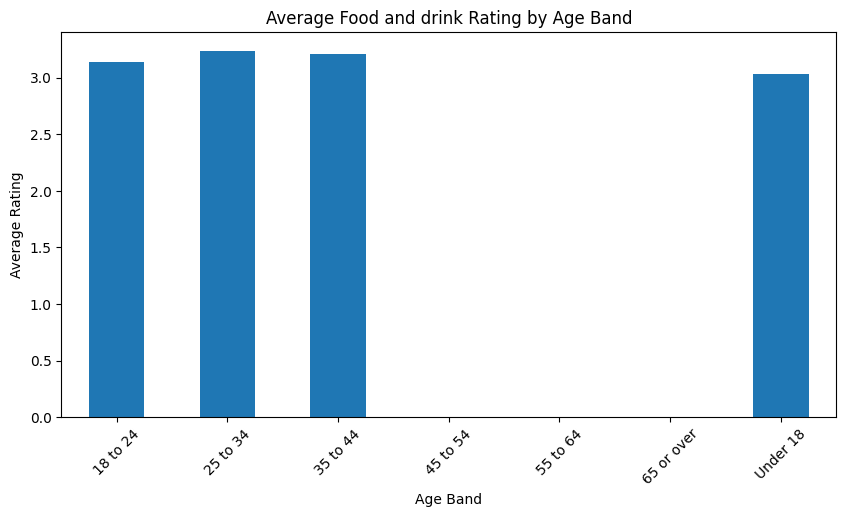

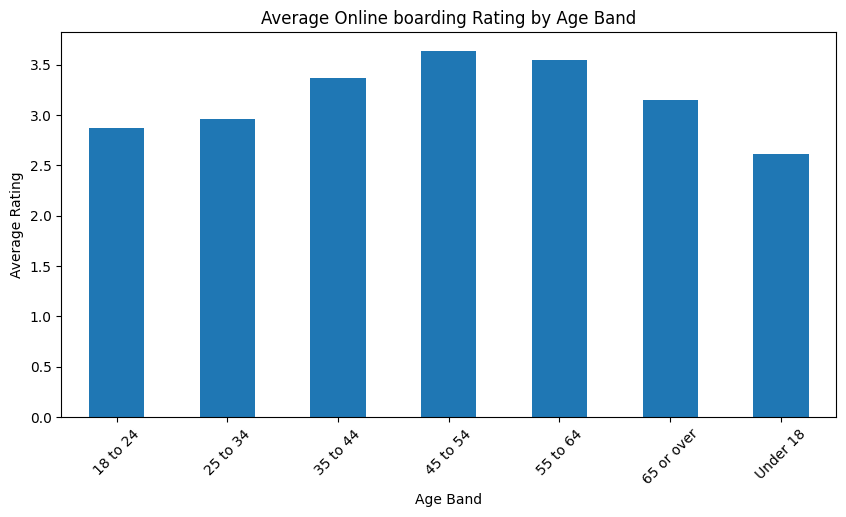

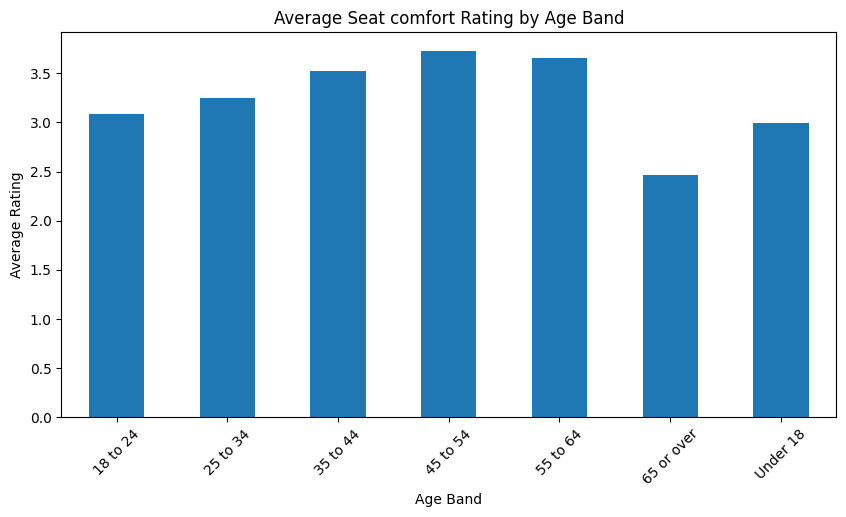

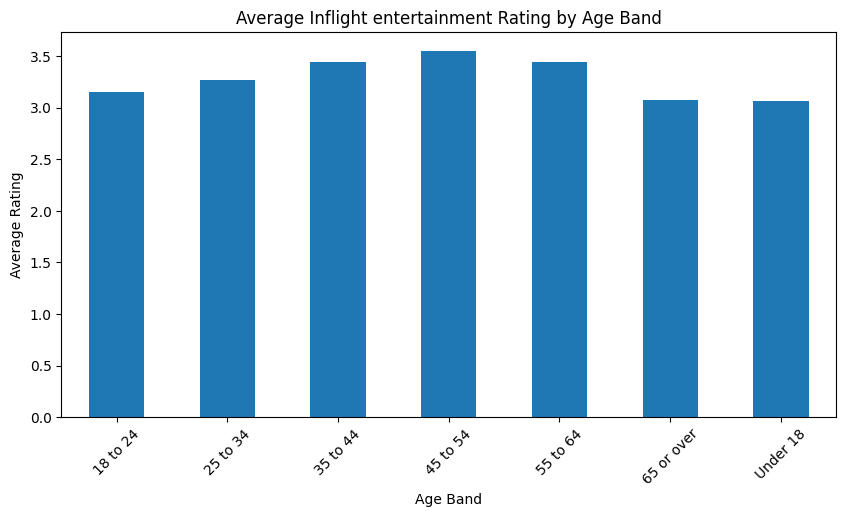

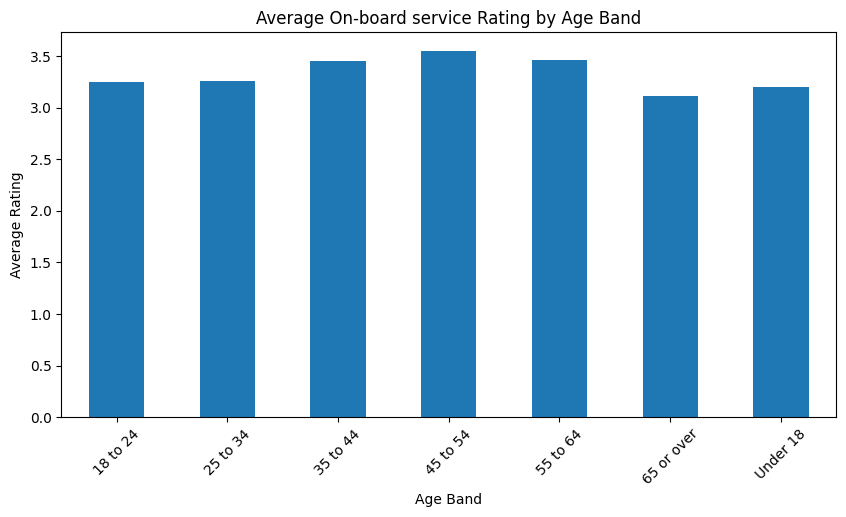

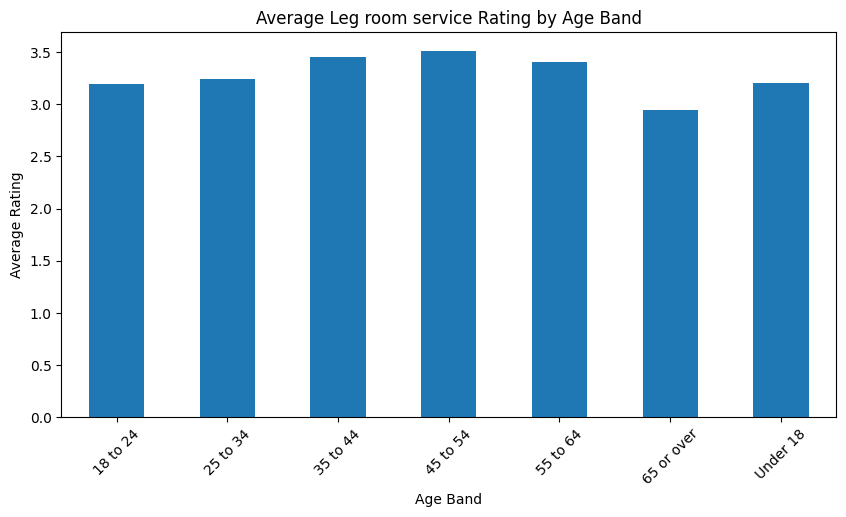

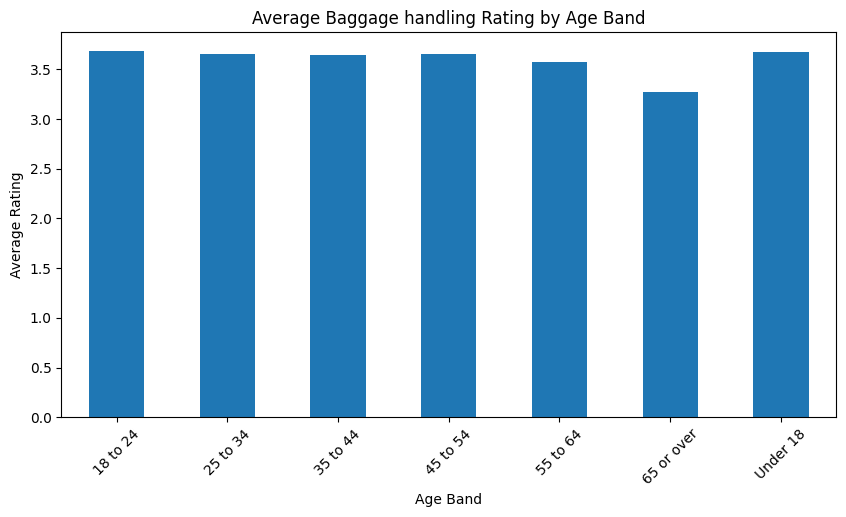

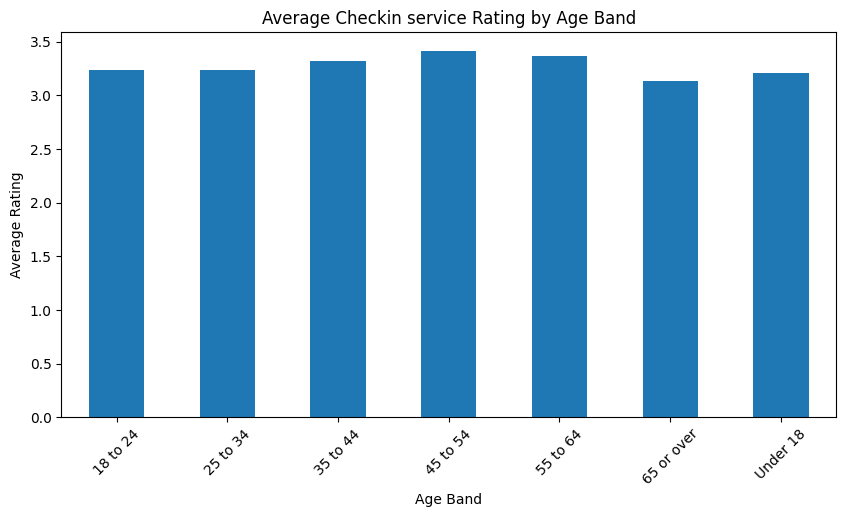

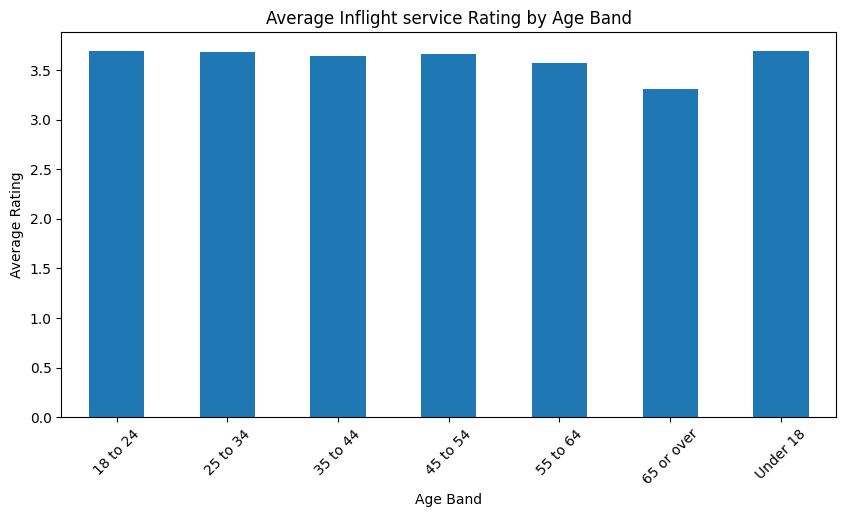

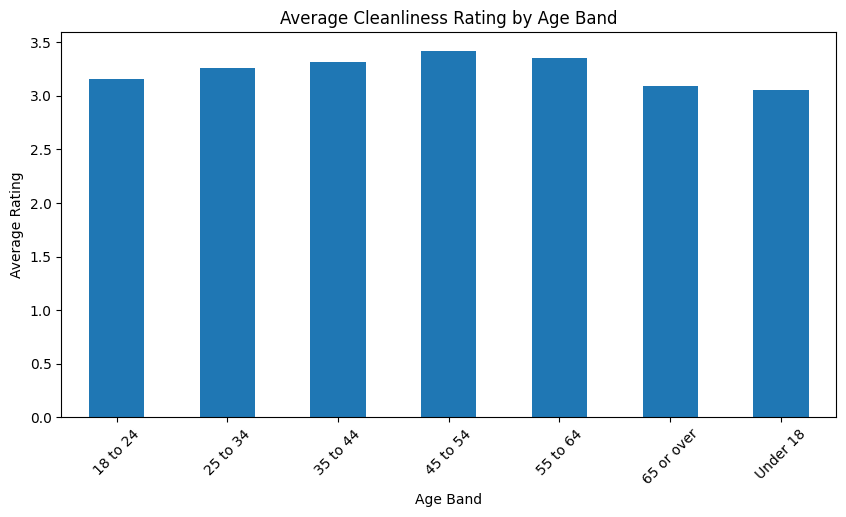

In [ ]:

# Calculate the mean rating for each service by age group
mean_ratings = skywards_data_services.groupby('Age Band').mean()

# Plot a bar chart for each service
for column in mean_ratings.columns:
    plt.figure(figsize=(10, 5))
    mean_ratings[column].plot(kind='bar')
    plt.title(f'Average {column} Rating by Age Band')
    plt.xlabel('Age Band')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()




# **Predictive Modelling to Increase Customer Satisfaction**

##Random Forest


#####Random Forest is an ensemble of decision trees, typically trained with the “bagging” method. The basic idea is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [ ]:
# Importing the libaries for training and testing the data

# The dataset is split by using the function train_test_split().
# 3 parameters are needed to be passed: features, target, and test_set size.
# Additionally, `random_state` can be used to select records randomly.
# Thereafter `RandomForestClassifier` is imported from sklearn.ensemble and fit the classifier over the training data.
# The performance of the model can be evaluated by calculating the model score.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
'''
X (Features): This is a 2D array or a DataFrame containing the input data
that the model will use to learn patterns. It includes all the columns except the
target variable (the one the model is trying to predict). In your code,
X = skywards_data.drop(columns=columns_to_drop, axis=1) means that X contains all columns from the
DataFrame skywards_data except for the columns in columns_to_drop variable, which are dropped.
y (Labels/Targets): This is usually a 1D array or a Series containing the target variable.
It’s what the model is trying to predict. In your code, y = skywards_data['Satisfied']
means that y is the ‘Satisfied’ column from skywards_data.
'''

columns_to_drop = ['Gender', 'Satisfied', 'Age', 'Age Band','Type of Travel', 'Class', 'Destination']

X = skywards_data.drop(columns=columns_to_drop, axis=1)
y = skywards_data['Satisfied']

print(X.shape, y.shape)

(103484, 17) (103484,)


In [ ]:
'''
`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)`:
This line splits the dataset into training and testing sets. X contains the features, and y contains the labels.
test_size=0.20 means that 20% of the data will be used for testing, and the remaining 80% for training.
random_state=0 ensures reproducibility; the split will be the same each time the code is run.

`model = RandomForestClassifier()`:
This function is used to instantiate a RandomForest classifier, which is a type of ensemble learning model
used for classification tasks.

`model.fit(X_train, y_train)`:
The model is trained using the training data X_train and the corresponding labels y_train.

model.score(X_test, y_test):
After training, the model’s performance is evaluated on the test set.
This line returns the accuracy score, which is the proportion of correct predictions over the total number of predictions.
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_RFC = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
'''
True Negative (TN): The number of instances where the model correctly predicted the negative class (class 0).
In your case, there were 10,436 true negatives, meaning the model correctly identified 10,429 instances as class 0.

False Positive (FP): The number of instances where the model incorrectly predicted the positive class (class 1).
There were 936 false positives, meaning the model incorrectly predicted 936 instances as class 1 when they were actually class 0.

False Negative (FN): The number of instances where the model incorrectly predicted the negative class (class 0).
There were 530 false negatives, meaning the model incorrectly predicted 530 instances as class 0 when they were actually class 1.

True Positive (TP): The number of instances where the model correctly predicted the positive class (class 1).
There were 8,802 true positives, meaning the model correctly identified 8,802 instances as class 1.

These counts are important for understanding the model’s performance beyond simple accuracy.
They can be used to calculate more detailed metrics like precision, recall, and F1-score,
which give a better sense of how well the model is doing, especially if the classes are imbalanced.
The high numbers of true positives and true negatives suggest that the model is not performing badly.
'''

df3 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RFC})
df3['Predicted'] = df3['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df3 = df3.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df3['Result'] = results
df3 = df3[["Result","Actual","Predicted","Count"]]
df3.head()

,Result,Actual,Predicted,Count
0,True Negative,0,0,10417
1,False Positive,0,1,948
2,False Negative,1,0,552
3,True Positive,1,1,8780


In [ ]:
accRFC = metrics.accuracy_score(y_test, y_pred_RFC)

print('Random Forest Accuracy:', accRFC)
print()
print('Classification Report:\n', classification_report(y_test, y_pred_RFC))

Random Forest Accuracy: 0.9275257283664299

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11365
           1       0.90      0.94      0.92      9332

    accuracy                           0.93     20697
   macro avg       0.93      0.93      0.93     20697
weighted avg       0.93      0.93      0.93     20697



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
tree_clf.score(X_test, y_test)

0.9001787698700294

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)

print("Single Tree Accuracy:", acc)

Single Tree Accuracy: 0.9001787698700294


In [ ]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1['Predicted'] = df1['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df1 = df1.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df1['Result'] = results
df1 = df1[["Result","Actual","Predicted","Count"]]
df1.head()

,Result,Actual,Predicted,Count
0,True Negative,0,0,10380
1,False Positive,0,1,985
2,False Negative,1,0,1081
3,True Positive,1,1,8251


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     11365
           1       0.89      0.88      0.89      9332

    accuracy                           0.90     20697
   macro avg       0.90      0.90      0.90     20697
weighted avg       0.90      0.90      0.90     20697



###Confusion Matrix

In [ ]:
# The code imports a function called confusion_matrix used to assess how well a classification algorithm performs.
# It helps visualize how many predictions were correct and where the model made mistakes.
from sklearn.metrics import confusion_matrix

In [ ]:
'''
To illustrate the outputs of the Decision Tree and Random Forest models, we can create a confusion matrix
for each model and then generate a heat map from these matrices.
Below is the Python code using matplotlib and seaborn for visualization
'''

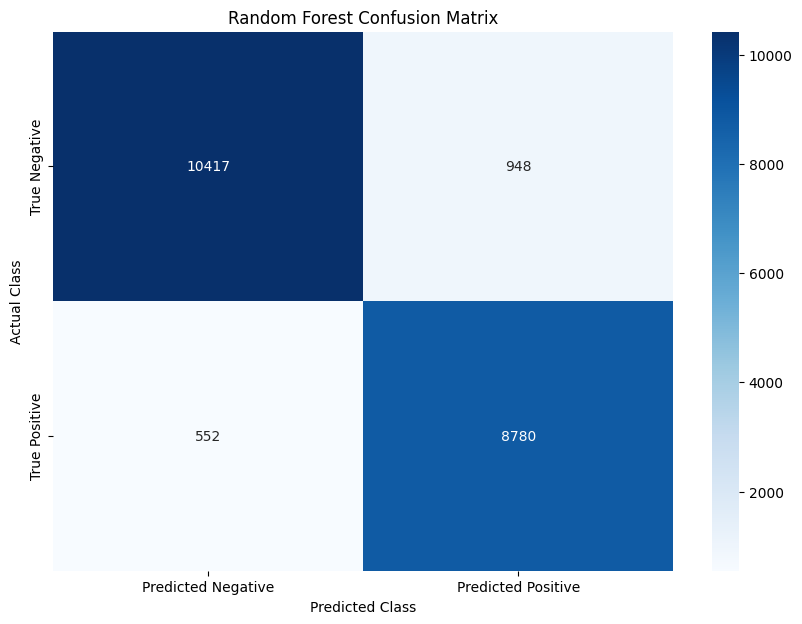

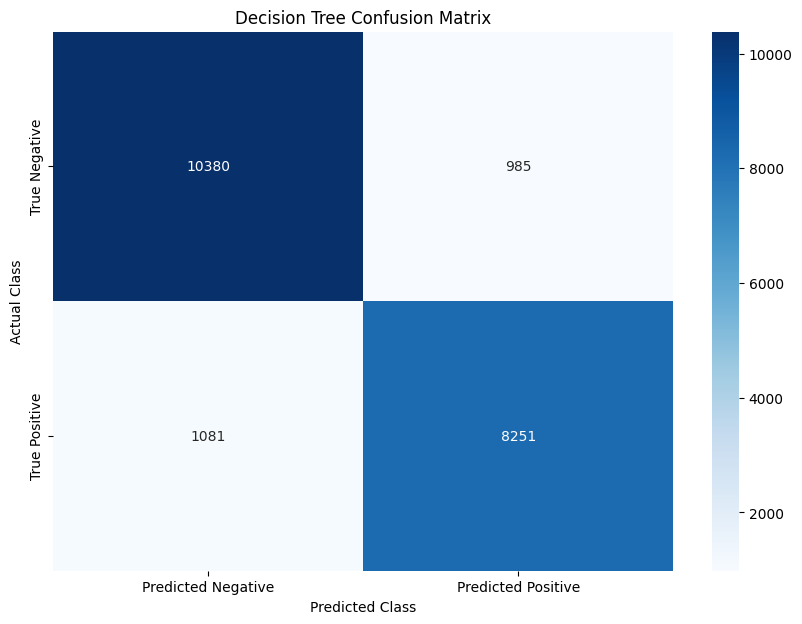

In [ ]:
y_true = y_test # Actual labels
y_pred_rf = y_pred_RFC  # Random Forest predictions
y_pred_dt = y_pred  # Decision Tree predictions

# Calculate confusion matrices
cm_rf = confusion_matrix(y_true, y_pred_rf)
cm_dt = confusion_matrix(y_true, y_pred_dt)

# Create a DataFrame for better heatmap visualization
df_cm_rf = pd.DataFrame(cm_rf, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
df_cm_dt = pd.DataFrame(cm_dt, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plotting the Random Forest confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_rf, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Plotting the Decision Tree confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_dt, annot=True, fmt='g', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

###ROC


##### The ROC curve is a useful tool for comparing the performance of different models and selecting the best one for SKywards' predictive tasks. In this case, the Random Forest model is the preferred choice due to its higher AUC value.

##### This snippet plota the ROC curves for both models. The predict_proba function is used to get the probabilities for the positive class, which are then used to calculate the true positive and false positive rates. The roc_curve function computes these rates for various threshold values, and the auc function calculates the area under the ROC curve, which is a measure of the model’s ability to distinguish between the classes. The plot shows both curves, with the AUC values in the legend.


#### Libaries
**matplotlib.pyplot**: This is a plotting library used for creating static, interactive, and animated visualizations in Python. The plt is a commonly used shorthand for matplotlib.pyplot, which provides functions to change the properties of figures and plots.

**roc_curve:** A function from the sklearn.metrics module, it computes the Receiver Operating Characteristic (ROC) curve, which is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

**auc:** Also from the sklearn.metrics module, auc stands for “Area Under the Curve.” It calculates the area under the ROC curve, providing an aggregate measure of performance across all possible classification thresholds.

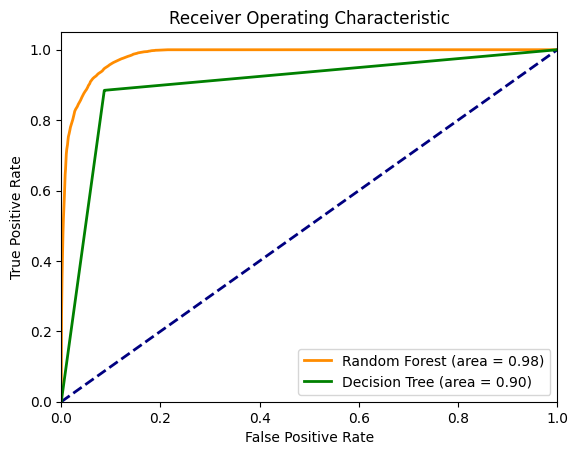

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# For Random Forest
y_pred_proba_RFC = model.predict_proba(X_test)[::,1]
fpr_RFC, tpr_RFC, _ = roc_curve(y_test,  y_pred_proba_RFC)
auc_RFC = auc(fpr_RFC, tpr_RFC)

plt.figure()
plt.plot(fpr_RFC, tpr_RFC, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % auc_RFC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# For Decision Tree
y_pred_proba_DT = tree_clf.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = roc_curve(y_test,  y_pred_proba_DT)
auc_DT = auc(fpr_DT, tpr_DT)

plt.plot(fpr_DT, tpr_DT, color='green', lw=2, label='Decision Tree (area = %0.2f)' % auc_DT)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### From the ROC image derived above, the Random Forest model has an AUC of 0.98, which is quite high, indicating excellent model performance. The Decision Tree model has an AUC of 0.90, which is also good but not as high as the Random Forest model.

# Reference

Eric (2020) ‘google colab UnicodeDecodeError: “utf-8” codec can’t decode byte 0xfa in position 21: invalid start byte’, Stack Overflow. [Online] Available at: https://stackoverflow.com/q/65238866 [Date Accessed: 21 March 2024].